In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# importing utils
import sys

sys.path.append('..')
from utils.cleaning import CleanData
from utils.advanced_groupby import advanced_groupby

{'Apple': ['Apple iPad (A1823)', 'Apple iPad (A1954)', 'Apple iPad 2 (A1396)', 'Apple iPad 3 (A1430)', 'Apple iPad 4 (A1460)'], 'Samsung': ['Samsung 2018 Galaxy J4', 'Samsung Galaxy A3 (Sm-A300X)', 'Samsung Galaxy A3 (Sm-A310X)', 'Samsung Galaxy A3 (Sm-A320)', 'Samsung Galaxy A5 (Sm-A500X)'], 'Huawei': ['Huawei Ale-Ul00', 'Huawei Ascend G6', 'Huawei Ascend G620S', 'Huawei Ascend Mate7', 'Huawei Ascend P7']}


In [3]:
# import dataset
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
for_dashboard = dict()

In [5]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
# cleaning the data and dealing with null values

# drop all null values with column null count less that 10
data = CleanData(df)
data.drop_rows(drop_in_columns=['Start','Start ms','End','End ms','Dur. (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','Activity Duration DL (ms)','Activity Duration UL (ms)','Total UL (Bytes)','Dur. (ms).1','Total DL (Bytes)'])

# drop all rows with null that cant be replaced by mean
data.drop_rows(drop_in_columns=['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer','Handset Type'])

# fill columns with mean with null less or about 1000
data.fill_with_mean(fill_columns=['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'])

# additional fill with mean
data.fill_with_mean(fill_columns=['Avg RTT DL (ms)','Avg RTT UL (ms)'])

# fill tcp with mode
data.fill_with_mode(fill_columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])

# drop columns with more than 50% null
data.drop_unwanted_column(unwanted_columns=['HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'])

Automation in Action...!!!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304240e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082010e+14,3.366865e+10,3.533250e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277830e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349880e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311450e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [7]:
data.df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [8]:
clean_data = data.df
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
clean_data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
TCP UL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [10]:
# saving clean data dataset
clean_data.to_csv('../data/clean_data.csv')

# Task 1
1. Start by identifying the top 10 handsets used by the customers.
2. Then, identify the top 3 handset manufacturers
3. Next, identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams

<AxesSubplot:>

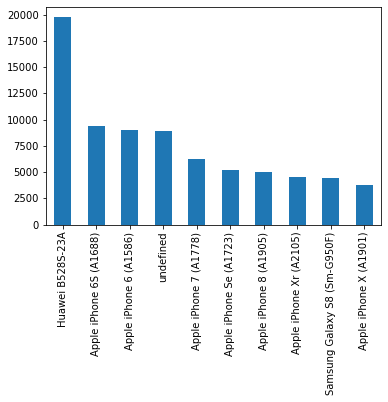

In [11]:
# task 1 1 identifying top 10 handsets used by customers
clean_data['Handset Type'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

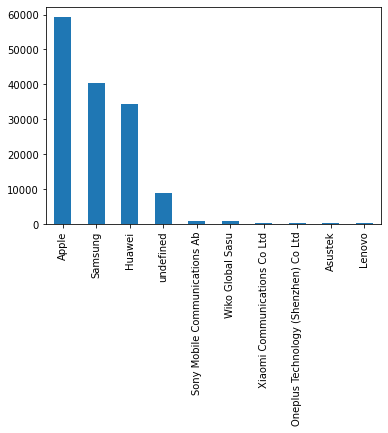

In [12]:
# task 1 2 indentifying top 3 handset manufacturers
clean_data['Handset Manufacturer'].value_counts()[:10].plot(kind='bar')

In [13]:
# get top 3 handset manufacturer
advanced_groupby(clean_data,'Handset Manufacturer','Handset Type')

{'Apple': ['Apple iPad (A1823)',
  'Apple iPad (A1954)',
  'Apple iPad 2 (A1396)',
  'Apple iPad 3 (A1430)',
  'Apple iPad 4 (A1460)'],
 'Samsung': ['Samsung 2018 Galaxy J4',
  'Samsung Galaxy A3 (Sm-A300X)',
  'Samsung Galaxy A3 (Sm-A310X)',
  'Samsung Galaxy A3 (Sm-A320)',
  'Samsung Galaxy A5 (Sm-A500X)'],
 'Huawei': ['Huawei Ale-Ul00',
  'Huawei Ascend G6',
  'Huawei Ascend G620S',
  'Huawei Ascend Mate7',
  'Huawei Ascend P7'],
 'undefined': ['undefined'],
 'Sony Mobile Communications Ab': ['Sony Mobile Comm. Pm-1150-Bv',
  'Sony Mobile Comm. Pm-1151-Bv',
  'Sony Mobile Comm. Pm-1162-Bv',
  'Sony Mobile Comm. Pm-1164-Bv',
  'Sony Mobile Comm. Pm-1181-Bv']}

In [14]:
# task 1 3 top 5 handsets per top 3 handset manufacturer
group = advanced_groupby(clean_data,'Handset Manufacturer','Handset Type',3,5)
# group
g = clean_data.groupby(['Handset Manufacturer']).apply(lambda x: x.sort_values(['Handset Type'], ascending=False))
g.head(100)

Bearer Id            Start  \
Handset Manufacturer                                                            
A-Link Telecom International Co Limited 18715   1.304240e+19  4/24/2019 19:46   
                                        24014   7.277830e+18  4/24/2019 20:53   
                                        113630  6.917540e+18  4/27/2019 23:47   
                                        24450   1.304240e+19  4/24/2019 20:58   
                                        98614   1.304240e+19  4/27/2019 17:10   
...                                                      ...              ...   
Apple                                   56961   7.349880e+18  4/25/2019 19:14   
                                        131021  7.349880e+18  4/28/2019 12:30   
                                        91534   7.277830e+18  4/27/2019 14:54   
                                        56854   1.311450e+19  4/25/2019 18:57   
                                        56928   1.311450e+19  4/25/2019 19:08   

                                                Start ms              End  \
Handset Manufacturer                                                        
A-Link Telecom International Co Limited 18715      566.0  4/24/2019 23:25   
                                        24014      690.0  4/24/2019 23:36   
                                        113630     544.0  4/28/2019 23:47   
                                        24450      423.0   4/25/2019 0:01   
                                        98614      126.0   4/28/2019 1:36   
...                                                  ...              ...   
Apple                                   56961      817.0  4/27/2019 21:13   
                                        131021      33.0   4/30/2019 6:01   
                                        91534      155.0   4/28/2019 0:22   
                                        56854      371.0  4/27/2019 10:01   
                                        56928      215.0  4/27/2019 12:21   

                                                End ms  Dur. (ms)  \
Handset Manufacturer                                                
A-Link Telecom International Co Limited 18715    510.0    13183.0   
                                        24014    109.0     9803.0   
                                        113630   267.0    86384.0   
                                        24450     89.0    10993.0   
                                        98614    683.0    30359.0   
...                                                ...        ...   
Apple                                   56961    472.0   179900.0   
                                        131021   314.0   149462.0   
                                        91534    956.0    34067.0   
                                        56854    977.0   140645.0   
                                        56928    126.0   148362.0   

                                                        IMSI  MSISDN/Number  \
Handset Manufacturer                                                          
A-Link Telecom International Co Limited 18715   2.082020e+14   3.365960e+10   
                                        24014   2.082000e+14   3.367679e+10   
                                        113630  2.082000e+14   3.376042e+10   
                                        24450   2.082000e+14   3.367833e+10   
                                        98614   2.082010e+14   3.362357e+10   
...                                                      ...            ...   
Apple                                   56961   2.082020e+14   3.365946e+10   
                                        131021  2.082020e+14   3.366723e+10   
                                        91534   2.082010e+14   3.361120e+10   
                                        56854   2.082020e+14   3.364864e+10   
                                        56928   2.082010e+14   3.365838e+10   

                                                        IMEI  \
Hands

In [15]:
# getting all user data
columns_all_user_data = clean_data.columns
all_user_data = clean_data.groupby(['MSISDN/Number'])[columns_all_user_data].agg('sum')
all_user_data.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL

In [16]:
user_handset_groups = clean_data.groupby(['MSISDN/Number','Handset Manufacturer','Handset Type'])[columns_all_user_data].agg(['sum'])

# Task 1.1
●	Aggregate per user the following information in the column  
○	number of xDR sessions
○	Session duration
○	the total download (DL) and upload (UL) data
○	the total data volume (in Bytes) during this session for each application

In [17]:
# task 1.1
information = ['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)','Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
user_data = clean_data.groupby(['MSISDN/Number'])[information].agg(['sum'])
user_data.describe()

,Dur. (ms).1,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes)
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
count,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,106352.000000,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05,1.063520e+05
mean,1.466414e+08,1.466406e+05,6.342416e+08,5.735680e+07,2.503964e+06,45922.255087,8.022705e+06,2.868173e+06,2.499201e+06,6.519327e+05,1.622842e+07,1.535540e+07,1.621869e+07,1.534605e+07,5.887687e+08,1.156375e+07
std,1.861171e+08,1.861168e+05,4.650153e+08,3.568585e+07,1.888210e+06,34739.090049,6.069757e+06,2.174607e+06,1.898670e+06,4.952023e+05,1.233213e+07,1.160470e+07,1.232715e+07,1.161489e+07,4.444638e+08,8.739311e+06
min,7.142988e+06,7.142000e+03,8.827082e+06,2.866892e+06,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01
25%,7.272983e+07,7.272950e+04,3.150695e+08,3.640201e+07,1.176440e+06,21611.500000,3.806712e+06,1.341550e+06,1.185296e+06,3.067180e+05,7.654138e+06,7.251176e+06,7.599646e+06,7.217812e+06,2.795812e+08,5.453626e+06
50%,1.032477e+08,1.032470e+05,5.707748e+08,4.682048e+07,2.266996e+06,41595.500000,7.260542e+06,2.595316e+06,2.267304e+06,5.876120e+05,1.461604e+07,1.388304e+07,1.464634e+07,1.389070e+07,5.330223e+08,1.045421e+07
75%,1.728000e+08,1.727990e+05,8.078752e+08,6.586679e+07,3.269060e+06,59950.500000,1.043629e+07,3.746046e+06,3.252286e+06,8.528665e+05,2.114104e+07,1.998632e+07,2.114246e+07,2.001988e+07,7.674678e+08,1.508750e+07
max,1.855376e+10,1.855375e+07,8.156743e+09,7.295774e+08,4.274384e+07,630942.000000,1.161065e+08,3.608540e+07,3.360721e+07,9.013997e+06,2.378830e+08,2.150757e+08,1.994792e+08,2.032419e+08,7.622035e+09,1.547897e+08


In [18]:
# adding total dl and ul
user_data.columns = information
user_data['Total DL + UL'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']
user_data.head()

,Dur. (ms).1,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total DL + UL
MSISDN/Number,,,,,,,,,,,,,,,,,
3.360100e+10,116720140.0,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,8.786906e+08
3.360100e+10,181230963.0,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,1.568596e+08
3.360100e+10,134969374.0,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,5.959665e+08
3.360101e+10,49878024.0,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,4.223207e+08
3.360101e+10,37104453.0,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,1.457411e+09


In [19]:
# decile class from duration
user_data['Decile'] = pd.qcut(user_data['Dur. (ms).1'],5,labels=False)
user_data.head()

,Dur. (ms).1,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total DL + UL,Decile
MSISDN/Number,,,,,,,,,,,,,,,,,,
3.360100e+10,116720140.0,116720.0,8.426375e+08,36053108.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,8.786906e+08,2
3.360100e+10,181230963.0,181230.0,1.207552e+08,36104459.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,1.568596e+08,3
3.360100e+10,134969374.0,134969.0,5.566597e+08,39306820.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,5.959665e+08,3
3.360101e+10,49878024.0,49878.0,4.019932e+08,20327526.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,4.223207e+08,0
3.360101e+10,37104453.0,37104.0,1.363130e+09,94280527.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,1.457411e+09,0


In [20]:
# decile groups summation
decile_group = user_data.groupby(['Decile'])['Total DL + UL'].agg(['sum'])
decile_group

,sum
Decile,
0,1.152475e+13
1,1.176275e+13
2,1.224934e+13
3,1.391819e+13
4,2.409784e+13


<AxesSubplot:>

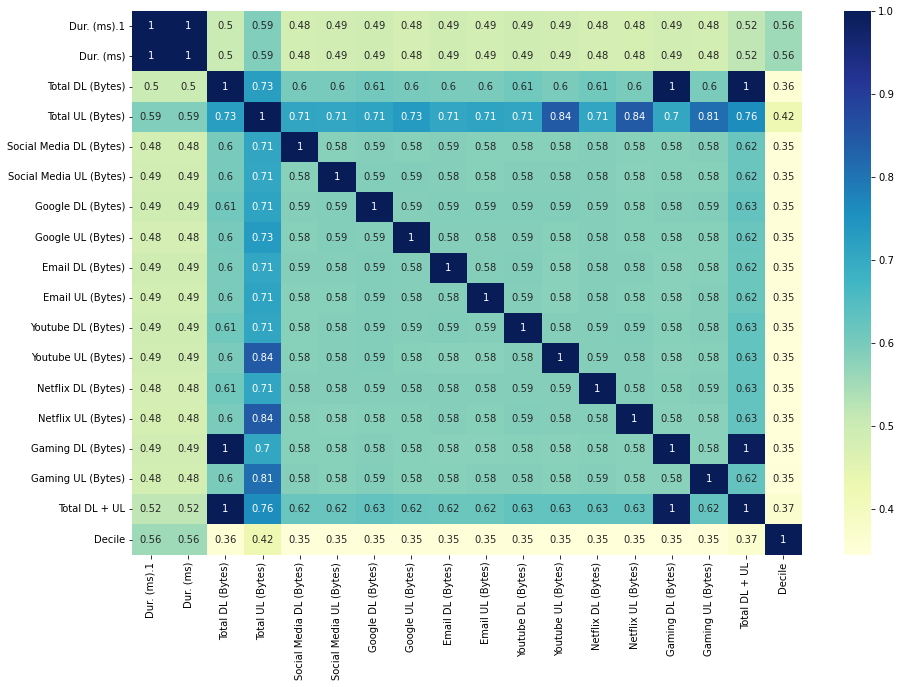

In [21]:
# correlation between data
corr = user_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True)

In [22]:
# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(data, dimensions=3):
    scaling = StandardScaler()
    scaling.fit(data)
    scaled_data = scaling.transform(data)
    principal = PCA(n_components=dimensions)
    principal.fit(scaled_data)
    x = principal.transform(scaled_data)
    return x

In [23]:
# return pca data
user_pca_data = apply_pca(user_data, 3)
print(user_pca_data.shape)

(106352, 3)


# Task 2
●	Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
●	Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
●	Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
●	Aggregate user total traffic per application and derive the top 10 most engaged users per application
●	Plot the top 3 most used applications using appropriate charts.  
●	Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
○	What is the optimized value of k (use elbow method for this)?  
○	Interpret your findings. 


In [24]:
# user_data.columns = information
user_data.columns

Index(['Dur. (ms).1', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Total DL + UL', 'Decile'],
      dtype='object')

In [25]:
# selecting engagement metrics
engagement_metrics = user_data[['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)']]
engagement_metrics.head()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0
3.360100e+10,181230.0,1.207552e+08,36104459.0
3.360100e+10,134969.0,5.566597e+08,39306820.0
3.360101e+10,49878.0,4.019932e+08,20327526.0
3.360101e+10,37104.0,1.363130e+09,94280527.0


In [26]:
# report top 10 customers per engagement metric
# engagement_metrics.groupby()

In [27]:
# normalizing the data
from sklearn.preprocessing import Normalizer

In [28]:
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot(data,k):
    norm = Normalizer()
    data_normalized = norm.fit_transform(data)
    clustering = MiniBatchKMeans(n_clusters=k, random_state=0).fit(data_normalized)
    clusters = clustering.predict(data_normalized)
    
    # adding clusters to data
    data['clusters'] = clusters
    labels = set(data['clusters'])
    
    # plotting clusters
    plt.figure(figsize=(15,10))
    sns.scatterplot(x='Dur. (ms)',y='Total DL (Bytes)',hue='clusters', palette=sns.color_palette('husl',k), data=data,legend='full')
    plt.show()
    return data

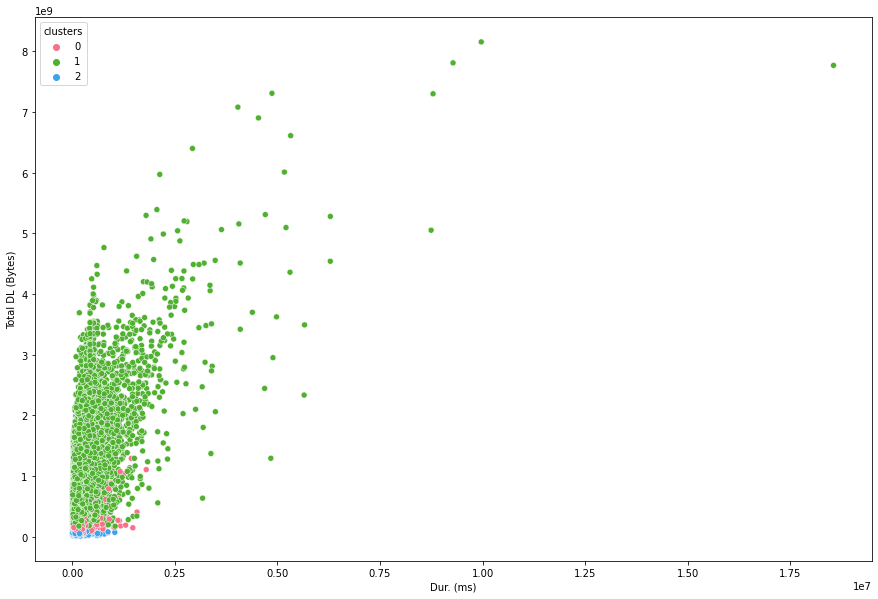

In [29]:
clustered_data = cluster_and_plot(engagement_metrics,3)
for_dashboard['clustered_data'] = clustered_data

In [30]:
clustered_data.head()

,Dur. (ms),Total DL (Bytes),Total UL (Bytes),clusters
MSISDN/Number,,,,
3.360100e+10,116720.0,8.426375e+08,36053108.0,1
3.360100e+10,181230.0,1.207552e+08,36104459.0,0
3.360100e+10,134969.0,5.566597e+08,39306820.0,1
3.360101e+10,49878.0,4.019932e+08,20327526.0,1
3.360101e+10,37104.0,1.363130e+09,94280527.0,1


In [31]:
# minimum maximum and average of each cluster
clustered_data['clusters'].describe()

count    106352.000000
mean          0.910759
std           0.390121
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: clusters, dtype: float64

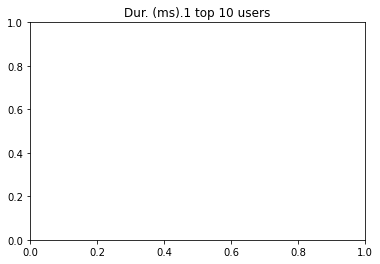

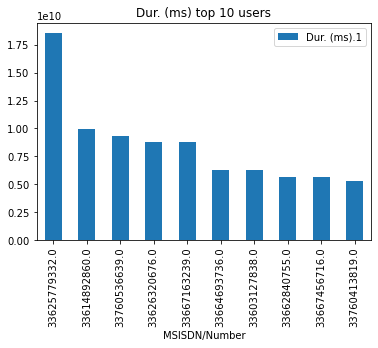

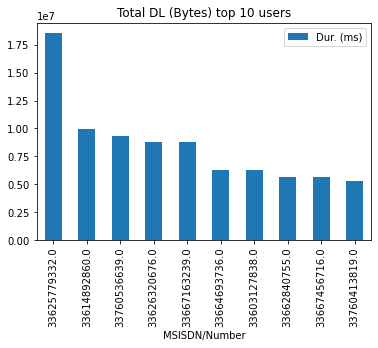

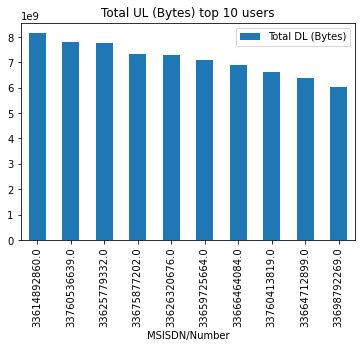

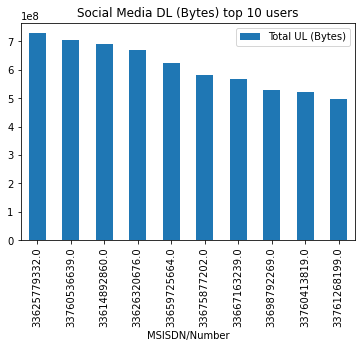

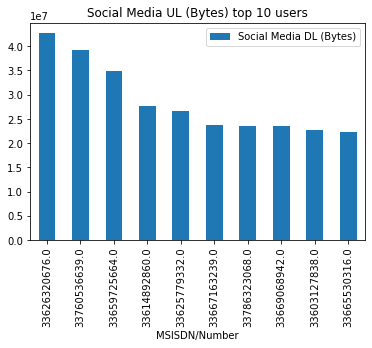

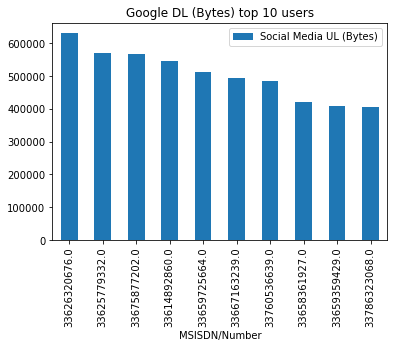

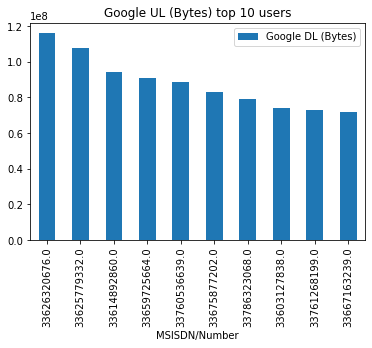

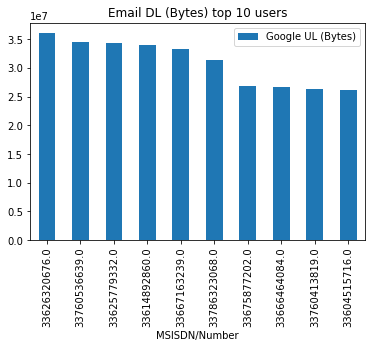

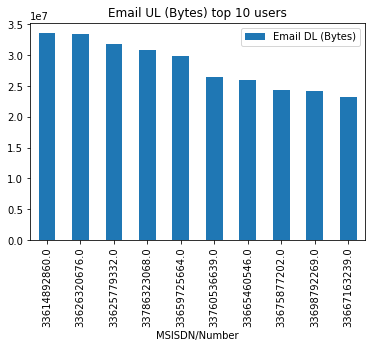

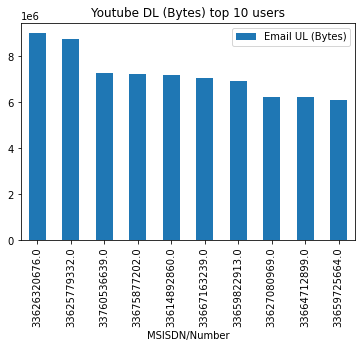

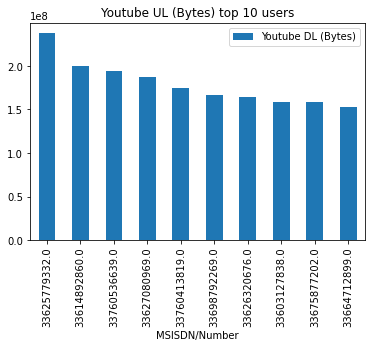

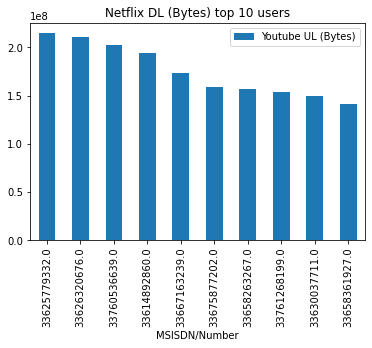

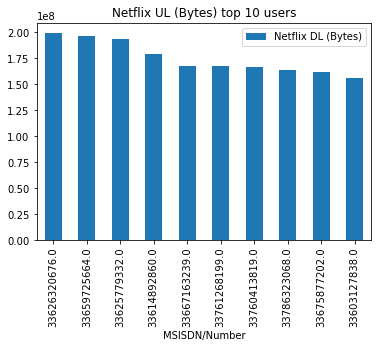

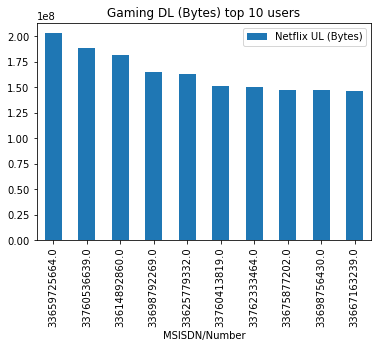

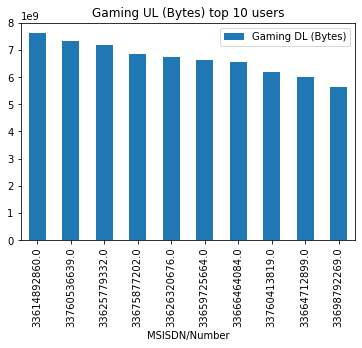

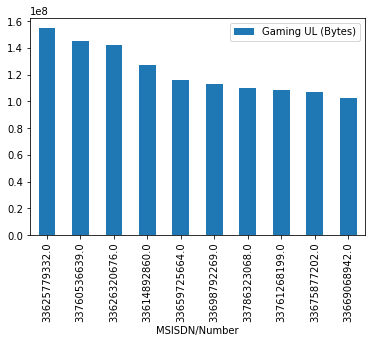

In [32]:
# user total traffic per application derive top 10 per application
for column in information:
    sorted = user_data.sort_values(column, axis=0, ascending=False, inplace=False)
    plt.title(column+' top 10 users')
    sorted[[column]].head(10).plot(kind='bar')

In [33]:
# top 3 most used applications
user_data.sum().sort_values(ascending=False)
# top 3 most used applications are Gaming DL, Youtube DL, Netflix DL

Total DL + UL              7.355288e+13
Total DL (Bytes)           6.745287e+13
Gaming DL (Bytes)          6.261672e+13
Dur. (ms).1                1.559561e+13
Total UL (Bytes)           6.100010e+12
Youtube DL (Bytes)         1.725924e+12
Netflix DL (Bytes)         1.724890e+12
Youtube UL (Bytes)         1.633078e+12
Netflix UL (Bytes)         1.632083e+12
Gaming UL (Bytes)          1.229828e+12
Google DL (Bytes)          8.532308e+11
Google UL (Bytes)          3.050359e+11
Social Media DL (Bytes)    2.663016e+11
Email DL (Bytes)           2.657950e+11
Email UL (Bytes)           6.933435e+10
Dur. (ms)                  1.559552e+10
Social Media UL (Bytes)    4.883924e+09
Decile                     2.126880e+05
dtype: float64

In [34]:
# clustering in possible kmeans
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot_ks(data):
    norm = Normalizer()
    wcss = []
    data_normalized = norm.fit_transform(data)
    for k in range(1,11):
        kmeans = MiniBatchKMeans(n_clusters=k, init="k-means++")
        kmeans.fit(data_normalized)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
    plt.xlabel('k values')
    plt.ylabel('wcss')
    plt.show()
    return wcss

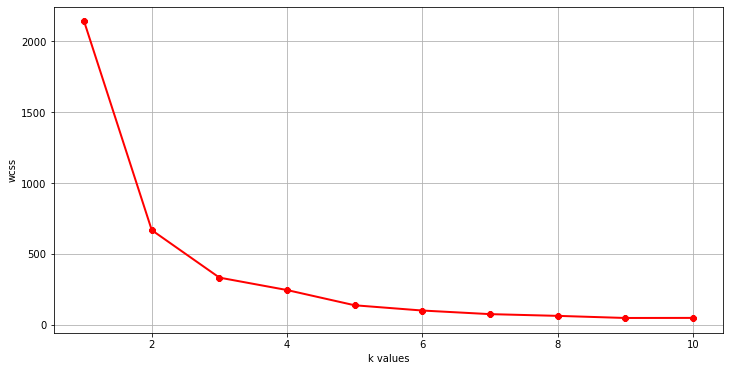

In [35]:
clustered_ks = cluster_and_plot_ks(engagement_metrics)
for_dashboard['clustered_ks'] = clustered_ks

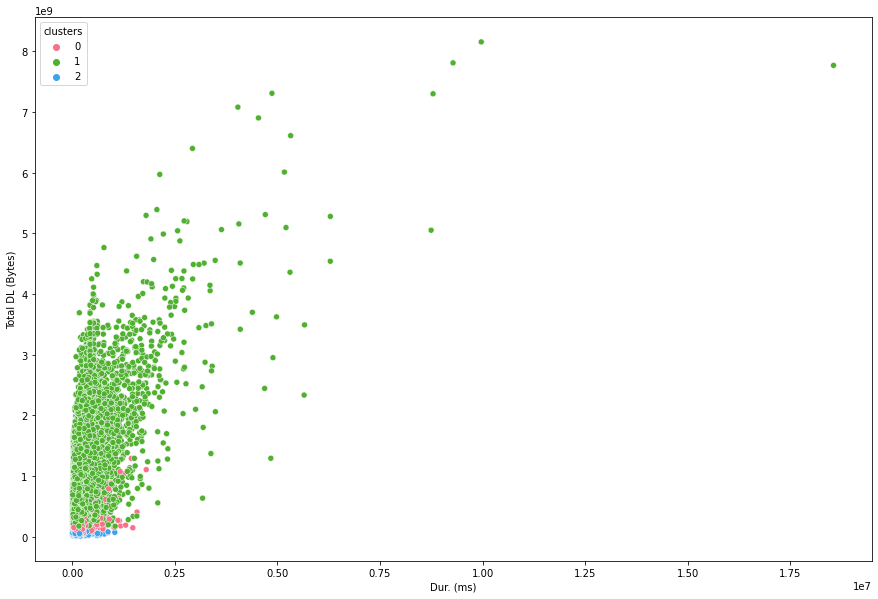

In [36]:
# the optimal k is 3 using elbow method
clustered_data = cluster_and_plot(engagement_metrics,3)
for_dashboard['clustered_data'] = clustered_data

# Task 3
Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
Average TCP retransmission
Average RTT
Handset type
Average throughput
Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
TCP values in the dataset. 
RTT values in the dataset.
Throughput values in the dataset.
Task 3.3 - Compute & report:
The distribution of the average throughput  per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.
Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [37]:
all_user_data.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL

In [38]:
import pandas as pd

class CleanData:
	def __init__(self, df:pd.DataFrame):
		self.df = df
		print('Automation in Action...!!!')

	def fill_with_zero(self, fill_columns=[])->pd.DataFrame:
		for columns in fill_columns:
			self.df[column].fillna(value=0, inplace=True)
		return self.df


	def fill_with_ffill(self, fill_columns)->pd.DataFrame:
		# fill null values with forward fill
		for column in fill_columns:
			self.df[column] = self.df[column].fillna(method='ffill')
		
		return self.df

	def fill_with_bfill(self, fill_columns)->pd.DataFrame:
		# fill null values with backward fill
		for column in fill_columns:
			self.df[column] = self.df[column].fillna(method='bfill')
		return self.df

	def fill_with_mean(self, fill_columns)->pd.DataFrame:
		# fill null values with mean
		for column in fill_columns:
			column_mean = self.df[column].mean()
			self.df[column].fillna(value=column_mean, inplace=True)
		return self.df

	def fill_with_mode(self, fill_columns)->pd.DataFrame:
		# fill null values with mode
		for column in fill_columns:
			column_mode = self.df[column].mode()[0]
			self.df[column].fillna(value=column_mode, inplace=True)
		return self.df

	def fill_with_median(self, fill_columns)->pd.DataFrame:
		# fill null values with mode
		for column in fill_columns:
			column_median = round(self.df[column].median(),1)
			self.df[column].fillna(value=column_median, inplace=True)
		return self.df

	def drop_rows(self, drop_in_columns=[])->pd.DataFrame:
		# drop rows for certain columns or all of them
		if drop_in_columns:
			self.df.dropna(subset=drop_in_columns, inplace=True)
		else:
			self.df.dropna(inplace=True)
		return self.df

	def drop_unwanted_column(self, unwanted_columns)->pd.DataFrame:
		# drop columns in the list unwanted_columns
		self.df.drop(unwanted_columns, axis=1, inplace=True)
		return self.df

	def drop_duplicate(self)->pd.DataFrame:
		# drop all duplicates
		self.df.drop_duplicates(inplace=True)
		return self.df

	def convert_to_datetime(self, datetime_columns)->pd.DataFrame:
		# convert a list of columns to datetime format
		for column in datetime_columns:
			self.df[column] = pd.to_datetime(self.df[column], format='%Y%m%d : %H%M%S')
		return self.df

	def treat_outliers_with_mode(self, fill_columns)->pd.DataFrame:
		# loop through columns
		# find min_threshol and max of column
		# replace max by mode, min by min
		for column in fill_columns:
			min_threshold, max_threshold = self.df[column].quantile([0.001,0.999])
			print(type(max_threshold))
			column_mode = self.df[column].mode()[0]
			column_min = self.df[column].min()
			# replacing ouliers
			self.df.loc[(self.df[column]>max_threshold),column] = column_mode
			self.df.loc[(self.df[column]<min_threshold),column] = column_min
		return self.df




In [39]:
outliers = CleanData(all_user_data)
columns_with_outliers = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
outliers.treat_outliers_with_mode(fill_columns=columns_with_outliers)

Automation in Action...!!!
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,1.311450e+19,138.0,278.0,116720.0,2.082010e+14,3.360100e+10,8.627420e+13,46.000000,0.000000,37.0,...,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,7.349880e+18,422.0,385.0,181230.0,2.082020e+14,3.360100e+10,3.553260e+13,30.000000,1.000000,48.0,...,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,7.349880e+18,80.0,454.0,134969.0,2.082020e+14,3.360100e+10,3.561270e+13,105.958376,17.633438,48.0,...,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,1.304240e+19,158.0,182.0,49878.0,2.082020e+14,3.360101e+10,3.520490e+13,69.000000,15.000000,204.0,...,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,1.462771e+19,1297.0,1750.0,37104.0,4.164040e+14,6.720202e+10,7.061360e+13,114.000000,5.000000,40395.0,...,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1.304240e+19,829.0,517.0,8810.0,2.082010e+14,3.379000e+10,8.687980e+13,42.000000,10.000000,9978.0,...,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,26716429.0,6.879252e+08
3.379000e+10,1.311450e+19,846.0,505.0,140988.0,2.082010e+14,3.379000e+10,3.529760e+13,34.000000,6.000000,68.0,...,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,35732243.0,4.445751e+08
3.197020e+12,7.277830e+18,345.0,670.0,877385.0,2.040810e+14,3.197020e+12,8.667580e+13,105.958376,17.633438,1.0,...,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,37295915.0,1.948281e+08


In [40]:
all_user_data = outliers.df
all_user_data.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,1.311450e+19,138.0,278.0,116720.0,2.082010e+14,3.360100e+10,8.627420e+13,46.000000,0.000000,37.0,...,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08
3.360100e+10,7.349880e+18,422.0,385.0,181230.0,2.082020e+14,3.360100e+10,3.553260e+13,30.000000,1.000000,48.0,...,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08
3.360100e+10,7.349880e+18,80.0,454.0,134969.0,2.082020e+14,3.360100e+10,3.561270e+13,105.958376,17.633438,48.0,...,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08
3.360101e+10,1.304240e+19,158.0,182.0,49878.0,2.082020e+14,3.360101e+10,3.520490e+13,69.000000,15.000000,204.0,...,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08
3.360101e+10,1.462771e+19,1297.0,1750.0,37104.0,4.164040e+14,6.720202e+10,7.061360e+13,114.000000,5.000000,40395.0,...,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09


In [41]:
# top 10 bottom 10 skipped
def top_bottom_frequent(data, columns, count=10):
    for column in columns:
        # top 
        data[column].sort_values(column,ascending=False, axis=0)
        # bottom
        data[column].sort_values(column, axis=0, inplace=False, ascending=True).reset_index(drop=False)[:count]
        # freq
        data[column].value_counts()[:10]

columns = ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)']
# top_bottom_frequent(all_user_data, columns, 10)

In [42]:
# creating clusters and visualizing
from sklearn.cluster import MiniBatchKMeans

def cluster_and_plot_experience(data,k):
    norm = Normalizer()
    data_normalized = norm.fit_transform(data)
    clustering = MiniBatchKMeans(n_clusters=k, random_state=0).fit(data_normalized)
    clusters = clustering.predict(data_normalized)
    
    # adding clusters to data
    data['experience'] = clusters
    labels = set(data['experience'])
    
    # plotting clusters
    plt.figure(figsize=(15,10))
#     sns.scatterplot(x='Dur. (ms)',y='DL TP < 50 Kbps (%)',hue='experience', palette=sns.color_palette('husl',k), data=data,legend='full')
#     plt.show()
    return data

In [43]:
# experience metrics
experience_metrics = all_user_data[['Dur. (ms)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)','Avg RTT DL (ms)', 'Avg RTT UL (ms)']]
experience_metrics.head()

,Dur. (ms),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT DL (ms),Avg RTT UL (ms)
MSISDN/Number,,,,,,,,,,,,,
3.360100e+10,116720.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1330.0,100.0,46.000000,0.000000
3.360100e+10,181230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1330.0,100.0,30.000000,1.000000
3.360100e+10,134969.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1330.0,100.0,105.958376,17.633438
3.360101e+10,49878.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1330.0,100.0,69.000000,15.000000
3.360101e+10,37104.0,162.0,30.0,2.0,4.0,183.0,15.0,0.0,0.0,22532.0,162.0,114.000000,5.000000


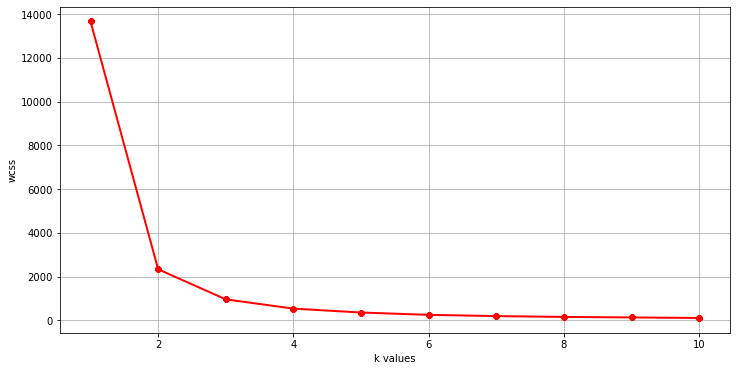

[13668.418077561848,
 2332.0359439565045,
 955.7070789667632,
 532.447744387838,
 353.8918457409111,
 247.94866782544486,
 190.27953493797594,
 151.69058411019014,
 129.19879733945513,
 104.4121484479034]

In [44]:
# task 3.4 experience clusters
cluster_and_plot_ks(experience_metrics)

In [45]:
user_experience_data = cluster_and_plot_experience(experience_metrics,3)
user_experience_data.groupby('experience').count()

,Dur. (ms),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT DL (ms),Avg RTT UL (ms)
experience,,,,,,,,,,,,,
0,84907,84907,84907,84907,84907,84907,84907,84907,84907,84907,84907,84907,84907
1,10398,10398,10398,10398,10398,10398,10398,10398,10398,10398,10398,10398,10398
2,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047


<Figure size 1080x720 with 0 Axes>

In [46]:
# user data dataframe
user_data.head()
clustered_data.head()
user_experience_data.head()
all_user_data['Decile'] = user_data['Decile']
all_user_data['Cluster Engagement'] = clustered_data['clusters']
all_user_data['Cluster Experience'] = user_experience_data['experience']
all_user_data['Total DL + UL'] = user_data['Total DL + UL']
all_user_data.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Decile,Cluster Engagement,Cluster Experience,Total DL + UL
MSISDN/Number,,,,,,,,,,,,,,,,,,,,,
3.360100e+10,1.311450e+19,138.0,278.0,116720.0,2.082010e+14,3.360100e+10,8.627420e+13,46.000000,0.000000,37.0,...,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08,2,1,0,8.786906e+08
3.360100e+10,7.349880e+18,422.0,385.0,181230.0,2.082020e+14,3.360100e+10,3.553260e+13,30.000000,1.000000,48.0,...,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08,3,0,0,1.568596e+08
3.360100e+10,7.349880e+18,80.0,454.0,134969.0,2.082020e+14,3.360100e+10,3.561270e+13,105.958376,17.633438,48.0,...,5.290685e+08,9759228.0,495086501.0,6607171.0,39306820.0,5.566597e+08,3,1,0,5.959665e+08
3.360101e+10,1.304240e+19,158.0,182.0,49878.0,2.082020e+14,3.360101e+10,3.520490e+13,69.000000,15.000000,204.0,...,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08,0,1,0,4.223207e+08
3.360101e+10,1.462771e+19,1297.0,1750.0,37104.0,4.164040e+14,6.720202e+10,7.061360e+13,114.000000,5.000000,40395.0,...,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09,0,1,2,1.457411e+09


In [53]:
# save all user data
all_user_data.to_csv('../data/clean_data.csv')

In [47]:
# # finding user engagement and experience score
# from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.preprocessing import StandardScaler

# engagement = all_user_data[['Cluster Engagement','Total DL + UL']].head()
# norm = Normalizer()
# # data_normalized = norm.fit_transform()
# engagement_normalized = norm.fit_transform(engagement)

# euclidean_engagement = euclidean_distances(engagement_normalized,engagement_normalized)
# euclidean_engagement


# Deliverables
1. Interim Submission

In [48]:
sample_data = clean_data[:5000]

In [49]:
def plot_relations(dataset, main):
    # plot Google UL (Bytes) to number if xdr sessions, session duration, total download and upload
    title = str(main)+' vs variables'
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,4,1)
    sns.scatterplot(data=dataset[['Dur. (ms).1',main]], x='Dur. (ms).1', y=main)

    plt.subplot(1,4,2)
    sns.scatterplot(data=dataset[['Dur. (ms)',main]], x='Dur. (ms)', y=main)

    plt.subplot(1,4,3)
    sns.scatterplot(data=dataset[['Total DL (Bytes)',main]], x='Total DL (Bytes)', y=main)

    plt.subplot(1,4,4)
    sns.scatterplot(data=dataset[['Total UL (Bytes)',main]], x='Total UL (Bytes)', y=main)
    
    plt.suptitle(title)
    plt.show()

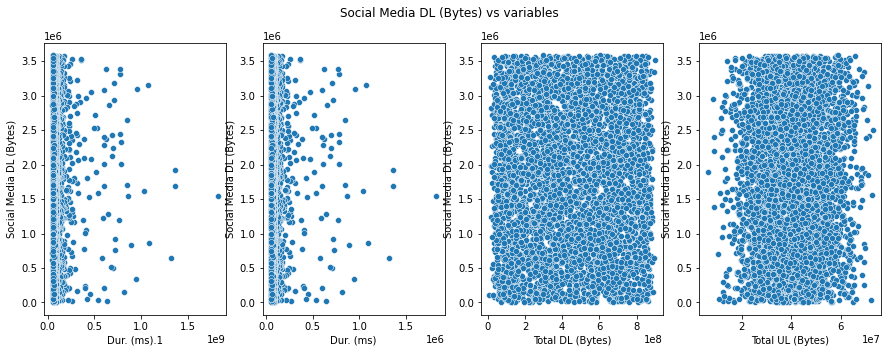

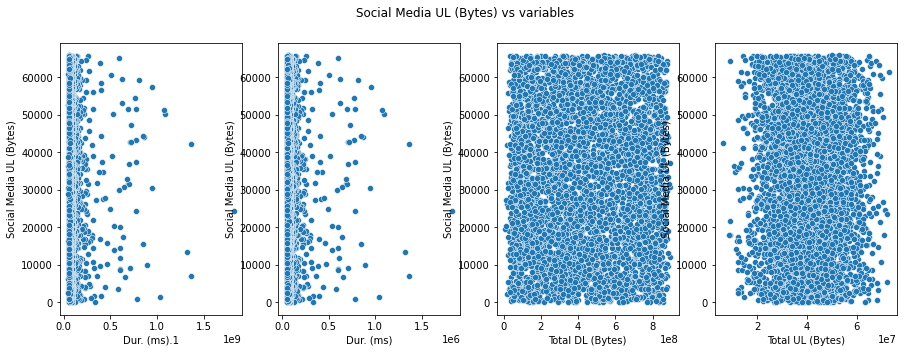

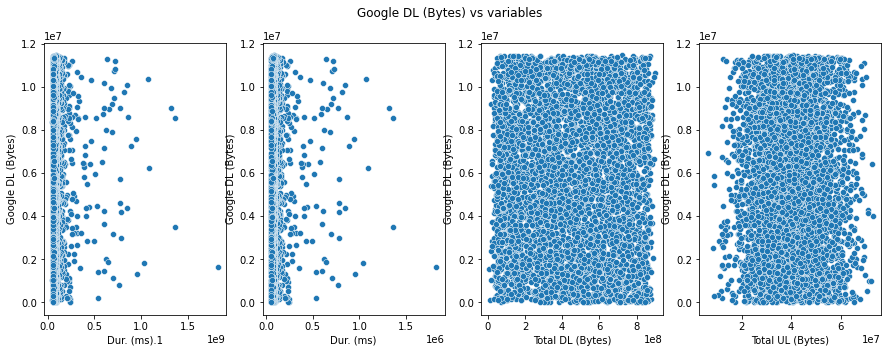

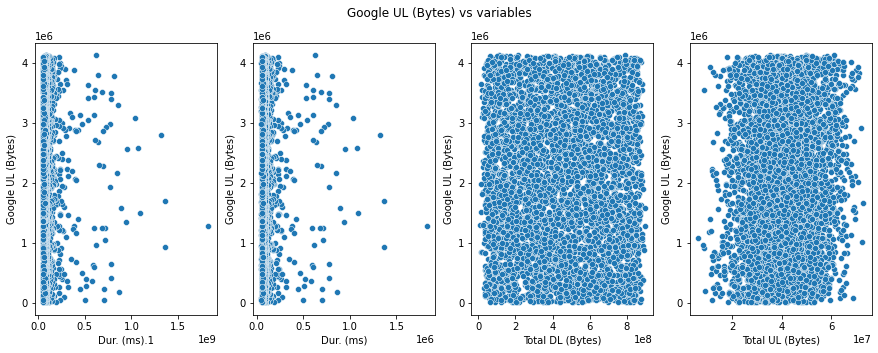

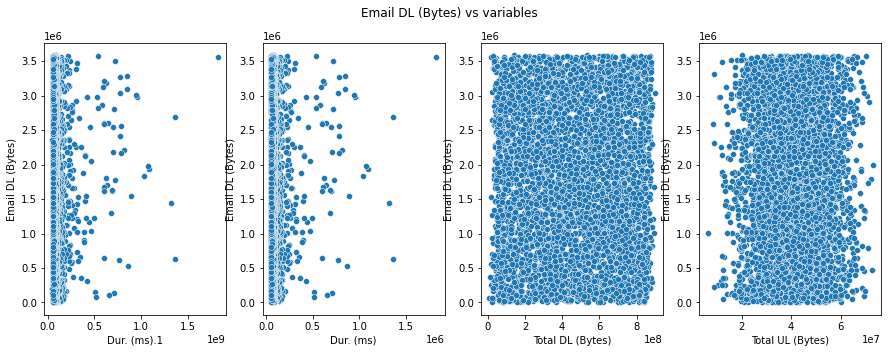

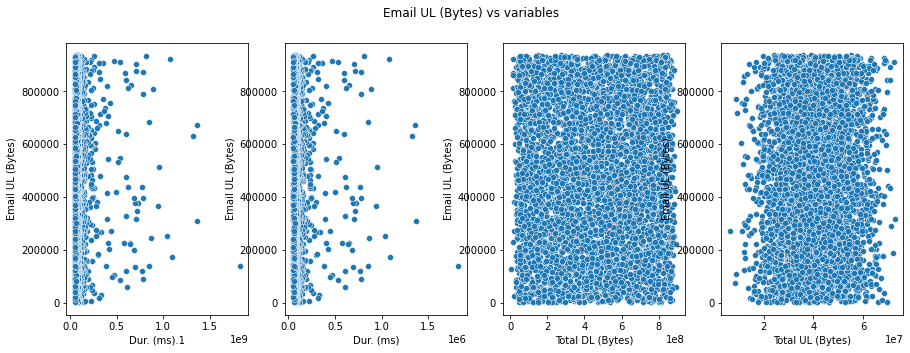

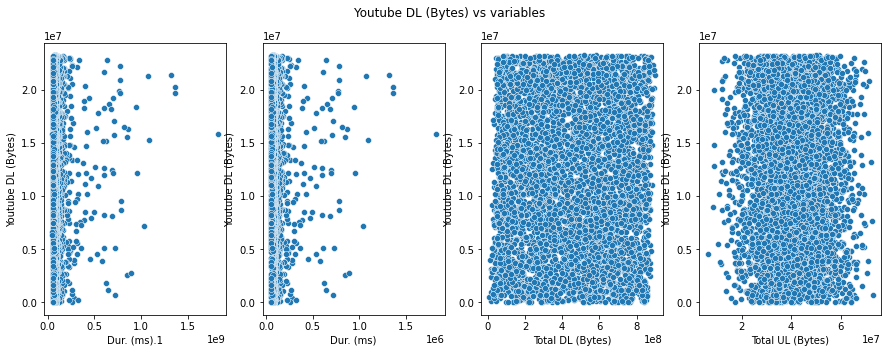

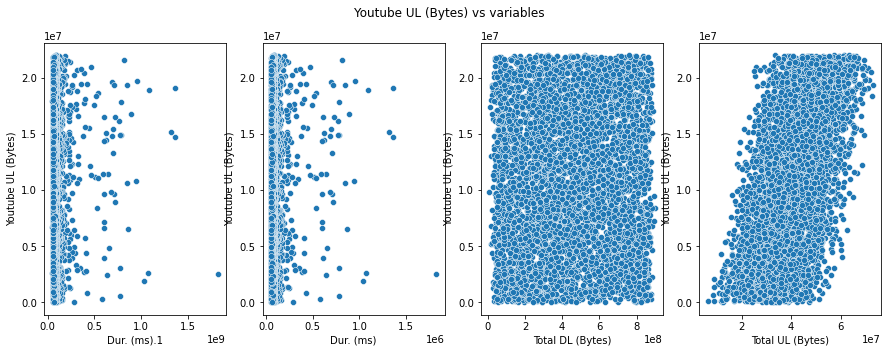

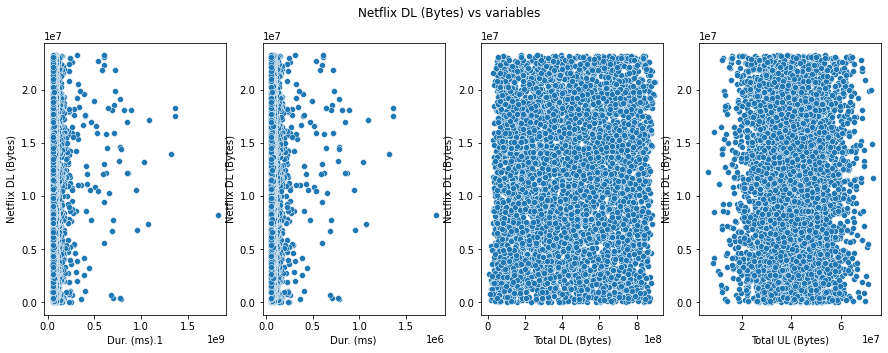

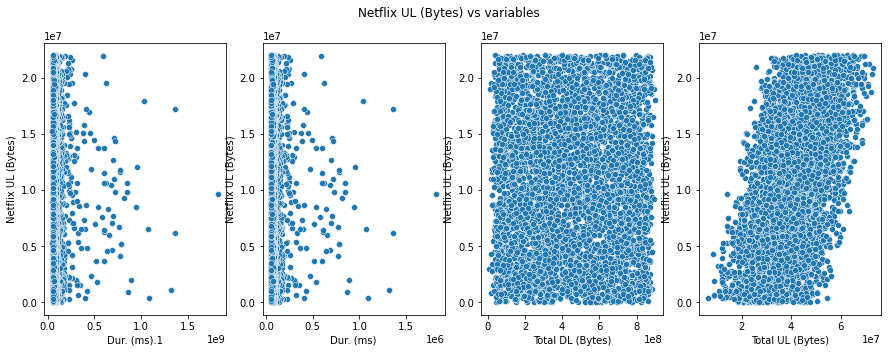

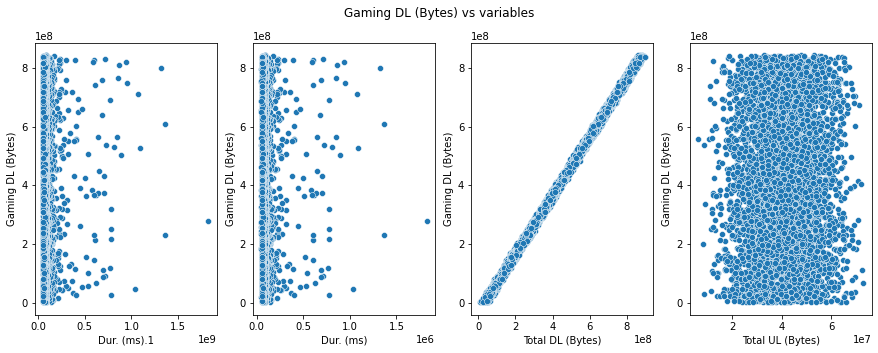

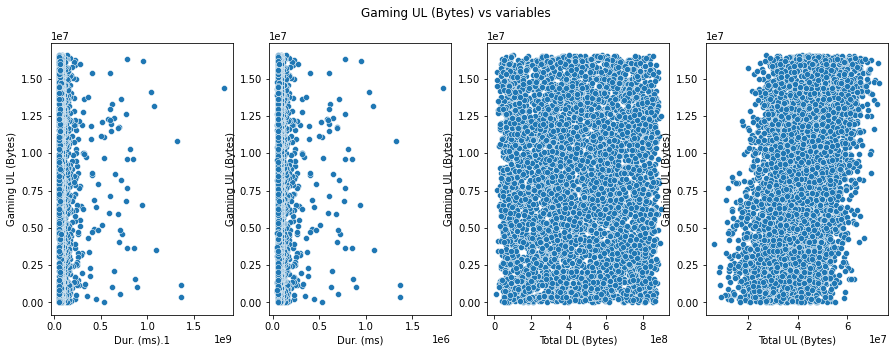

In [50]:
plot_list = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)', 'Gaming UL (Bytes)']
for figure in plot_list:
    main = figure
    plot_relations(sample_data[['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)',main]], main)

In [51]:
variables = ['Dur. (ms).1','Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)']
clean_data[variables].describe()

,Dur. (ms).1,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
count,1.483460e+05,1.483460e+05,1.483460e+05,1.483460e+05
mean,1.051299e+08,1.051294e+05,4.546996e+08,4.112015e+07
std,8.101835e+07,8.101836e+04,2.441771e+08,1.127958e+07
min,7.142988e+06,7.142000e+03,7.114041e+06,2.866892e+06
25%,5.837439e+07,5.837400e+04,2.431725e+08,3.321763e+07
50%,8.639999e+07,8.639900e+04,4.560177e+08,4.114375e+07
75%,1.329664e+08,1.329658e+05,6.657654e+08,4.903338e+07
max,1.859336e+09,1.859336e+06,9.029696e+08,7.833131e+07


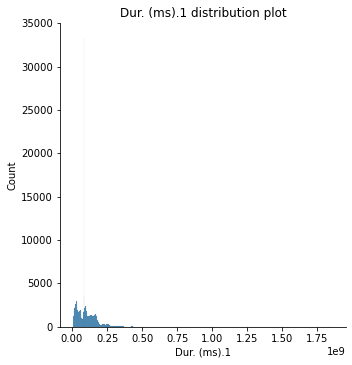

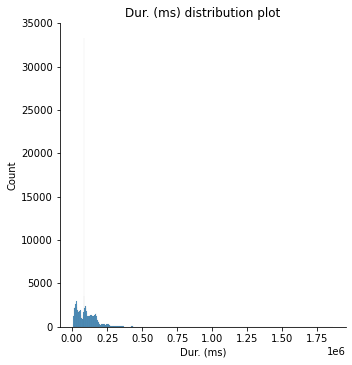

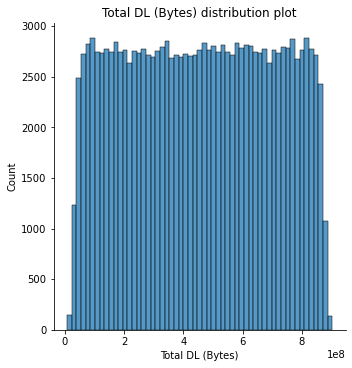

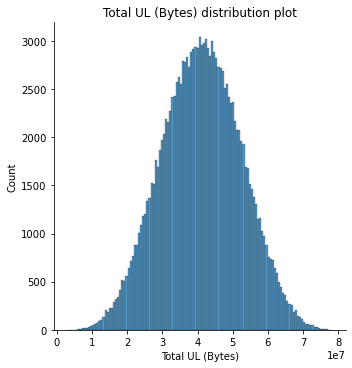

In [52]:
# distribution plot
for plot in variables:
    sns.displot(clean_data, x=plot).set(title=plot+" distribution plot")
    plt.show()